<center>
<img src="https://previews.123rf.com/images/ivanmogilevchik/ivanmogilevchik1704/ivanmogilevchik170400258/75575734-%EC%B2%AD-%EC%96%B4-%EC%86%A1%EC%96%B4%EC%99%80-%EC%8A%A4%EC%BC%80%EC%B9%98-%ED%95%B4%EC%82%B0%EB%AC%BC-%EC%8B%9C%EC%9E%A5%EC%9D%98-%EA%B0%9C%EB%85%90-%EC%9E%89%EC%96%B4-%EC%97%B0%EC%96%B4-%EB%84%99%EC%B9%98-%EC%9E%B0%EB%8D%94-%EB%86%8D%EC%96%B4-%EB%8C%80%EA%B5%AC-%EC%8A%A4%ED%94%BC%EB%A6%BF-%EB%AC%BC%EA%B3%A0%EA%B8%B0-%EC%A0%9C%ED%92%88-%EC%B9%B4%EC%9A%B4%ED%84%B0-%EB%B2%A1%ED%84%B0-%EC%9D%BC%EB%9F%AC%EC%8A%A4%ED%8A%B8-%EB%A0%88%EC%9D%B4%EC%85%98%EC%97%90.jpg" width=500>

# <center> kNN Classification on Fish Market

## Table of Contents  

1. [Introduction](#1.-Introduction)
2. [Data Exploration](#2.-Data-Exploration)
3. [Model Fitting and Training](#3.-Model-Fitting-Training)
4. [Sampling Issue](#4.-Sampling-Issue)
5. [Scaling Issue](#5.-Scaling-Issue)
6. [Conclusion](#6.-Conclusion) 

---

# 1. Introduction

Do you like fishing? I like fishing. This is one of reasons I chose this dataset.

This is the notebook for machine learning begginer using Fish market data. In particular, this will deal with KNeighborsClassifier Scikit-Learn class and this is one of classification methodology of ML. 

Overall I would like to focus 3 areas. 

* kNN Classification class
* Sampling issue
* Scaling issue 

I will talk about what kNN model is while showing how to deal with datasets.
And then talk about why sampling method is important in kNN which is classification ML. 

## Data Import

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler  


import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = 'Data_set/Fish.csv'
fish = pd.read_csv(file_path)

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish.shape

(159, 7)

# 2. Data Exploration

In [5]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


We have 6 columns in dataset. First '0' represents for fish species and the rest of columns are size-related data. 

According to the origin of data set;
* Weight: weight of fish in Gram g
* Length1: vertical length in cm
* Length2: diagonal length in cm
* Length3: cross length in cm
* Height: height in cm
* Width:diagonal width in cm

Dont' worry. We won't use all of columns. Instead we will utilize 3 columns only for our conveniences.

In [6]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


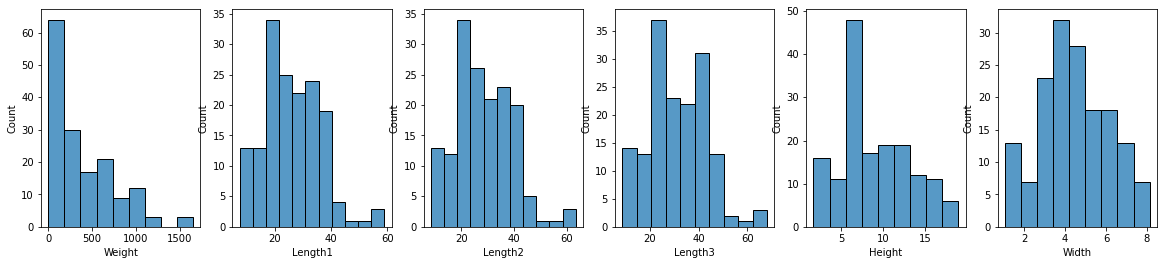

In [7]:
fig, ax = plt.subplots(ncols=6, figsize=(20, 4))

variables = fish.columns[1:]
for i, var in enumerate(variables):
    sns.histplot(data=fish, x=var, ax=ax[i])
plt.show()

In [8]:
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

As for Species, the dataset includes 7 types of fishes. 

Since this notebook is aiming for classification, I would like to use only Bream and Smelt only. 

If you are curious about how these look like, Bream looks like below. They tend to be narrow, deep-bodied species. The name is a derivation of the Middle English word breme, of Old French origin. [Refer to Wikipedia](https://en.wikipedia.org/wiki/Bream)
<img src="https://www.sydneyfishmarket.com.au/Portals/0/EasyDNNnews/1256/img-Yellowfin-Bream.jpg" width=400>

And this is Smelt. Smelts are a family of small fish, the Osmeridae, found in the North Atlantic and North Pacific Oceans, as well as rivers, streams and lakes in Europe, North America and Northeast Asia. [Refer to Wikipedia](https://en.wikipedia.org/wiki/Smelt_(fish))
<img src="https://images.squarespace-cdn.com/content/v1/5b071ddea2772cebc1662831/1530230170490-EKRCLOAKTK4639KO4E7M/ke17ZwdGBToddI8pDm48kInjuZb3CAvjvvi6Jf3mnjlZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZUJFbgE-7XRK3dMEBRBhUpx1viaq3v9Yxb9vhtvLFNwfo7-TXC8LW2F3Zy1D3lO8ahVwA8sicxz2pgFIqMhGFmM/smelt6.jpg" width=400>

## Bream & Smelt selection

In [9]:
bream = fish[fish['Species'] == 'Bream']
num_bream = len(bream)
print("# of Breams in datasets are", num_bream)

# of Breams in datasets are 35


In [10]:
bream_weight = bream['Weight'].values
bream_length = bream['Length2'].values

In [11]:
bream_weight

array([ 242.,  290.,  340.,  363.,  430.,  450.,  500.,  390.,  450.,
        500.,  475.,  500.,  500.,  340.,  600.,  600.,  700.,  700.,
        610.,  650.,  575.,  685.,  620.,  680.,  700.,  725.,  720.,
        714.,  850., 1000.,  920.,  955.,  925.,  975.,  950.])

In [12]:
bream_length

array([25.4, 26.3, 26.5, 29. , 29. , 29.7, 29.7, 30. , 30. , 30.7, 31. ,
       31. , 31.5, 32. , 32. , 32. , 33. , 33. , 33.5, 33.5, 34. , 34. ,
       34.5, 35. , 35. , 35. , 35. , 36. , 36. , 37. , 38.5, 38.5, 39.5,
       41. , 41. ])

In [13]:
smelt = fish[fish['Species'] == 'Smelt']
num_smelt = len(smelt)
print("# of Smelts in datasets are",num_smelt)

# of Smelts in datasets are 14


In [14]:
smelt_weight = smelt['Weight']
smelt_length = smelt['Length2']

In [15]:
smelt_weight

145     6.7
146     7.5
147     7.0
148     9.7
149     9.8
150     8.7
151    10.0
152     9.9
153     9.8
154    12.2
155    13.4
156    12.2
157    19.7
158    19.9
Name: Weight, dtype: float64

In [16]:
smelt_length

145     9.8
146    10.5
147    10.6
148    11.0
149    11.2
150    11.3
151    11.8
152    11.8
153    12.0
154    12.2
155    12.4
156    13.0
157    14.3
158    15.0
Name: Length2, dtype: float64

Having said, they are diffred by its size. Let's plot them by data and check. 

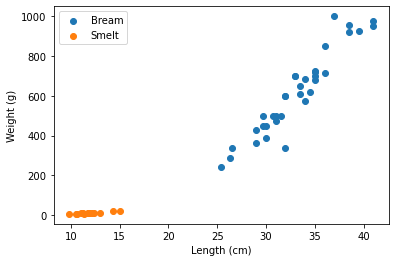

In [17]:
plt.scatter(bream_length, bream_weight, label='Bream')
plt.scatter(smelt_length, smelt_weight, label='Smelt')

plt.legend()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()


Among 49 fishes above, 14 smelts are located left bottom and 35 breams are right above. 

Data is ready now. We can fit the model for the classification with the data.

# 3. Model Fitting and Training

To fit the model, we need them in array. Since this is begginer tutorial, we will use only weight and length data sets for our convenience. 

As independant variables, weight and length will be used while Species labeled will be used for dependant variable. 

In [18]:
bream_data = np.c_[bream_weight, bream_length]
len(bream_data)

35

In [19]:
bream_data[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [20]:
bream_data[-5:]

array([[920. ,  38.5],
       [955. ,  38.5],
       [925. ,  39.5],
       [975. ,  41. ],
       [950. ,  41. ]])

In [21]:
smelt_data = np.c_[smelt_weight, smelt_length]
len(smelt_data)

14

In [22]:
smelt_data[:5]

array([[ 6.7,  9.8],
       [ 7.5, 10.5],
       [ 7. , 10.6],
       [ 9.7, 11. ],
       [ 9.8, 11.2]])

In [23]:
fish_data = np.r_[bream_data, smelt_data]
len(fish_data)

49

In [24]:
fish_data[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [25]:
fish_label = np.array([1] * num_bream + [0] * num_smelt)
fish_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

## Model selection

[**_k-nearest neighbors algorithm_**](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is used for classification and regression. In both cases, the input consists of the k closest training examples in data set. The output depends on whether k-NN is used for classification or regression.

<img src="https://miro.medium.com/max/800/1*2zYNhLc522h0zftD1zDh2g.png" width=500 align='left'>

> Since this algorithm relies on distance for classification, **_if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically._**

> AS this physical unit is so important, I would like to show step by step how this affects the output.  

> The neighbors are taken from a set of objects for which the class (for k-NN classification) or the object property value (for k-NN regression) is known. This can be thought of as the training set for the algorithm, though no explicit training step is required.

> A peculiarity of the k-NN algorithm is that it is sensitive to the local structure of the data.

In [26]:
knn_clf = KNeighborsClassifier() 

In [27]:
knn_clf.fit(X=fish_data, y=fish_label)

KNeighborsClassifier()

In [28]:
knn_clf._fit_X[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [29]:
knn_clf._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

Draft fitting model is done now. We can test and adjust them. 

## Model Evaluation

### **Performance Measure**

<img src='https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg' width=500>


* Accuracy: Classification accuracy is the total number of correct predictions divided by the total number of predictions made for a dataset
> `accuracy = (TN + TP) / (TN + FP + FN + TP)`

* Precision : Precision quantifies the number of positive class predictions that actually belong to the positive class
> `precision = TP / (FP + TP)`

* Recall: Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
> `recall = TP / (FN + TP)`

* F1-score: F-Measure provides a single score that balances both the concerns of precision and recall in one number.
> `f1 = 2 / (1/precision + 1/recall)`

In [30]:
train_predicts = knn_clf.predict(fish_data)
train_predicts

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [31]:
np.mean(train_predicts == fish_label)

1.0

In [32]:
knn_clf.score(X=fish_data, y=fish_label)

1.0

In [33]:
clf_report = classification_report(y_true=fish_label, y_pred=train_predicts, 
                                   labels=[0, 1],
                                   target_names=['Smelt', 'Bream'])
print(clf_report)

              precision    recall  f1-score   support

       Smelt       1.00      1.00      1.00        14
       Bream       1.00      1.00      1.00        35

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



Based on training with train dataset, the accuracy score is 100%. But we will see if it performs well with test set as well. 

Let's assume that there are 2 fishes in size one bream with 30cm/600g and one smelt with 14cm/30g each. We may stick them on the plot as below. 

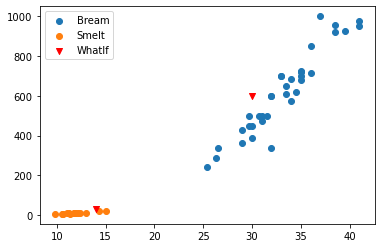

In [34]:
plt.scatter(bream_length, bream_weight, label='Bream')
plt.scatter(smelt_length, smelt_weight, label='Smelt')
plt.scatter([30, 14], [600, 30], marker='v', color='red', label='WhatIf')

plt.legend()
plt.show()

In [35]:
knn_clf.predict([[600, 30], [50, 14]])

array([1, 0])

In [36]:
knn_clf.predict([[600, 30]])

array([1])

In [37]:
knn_clf.predict([[50, 14]])

array([0])

According to its model, bream was predicted well, but smelt was wrong. What happened?

In the classification setting, the K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. The k-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples. Let $x_{i}$ be an input sample with $p$ features $(x_{i1}, x_{i2},..., x_{ip})$, $n$ be the total number of input samples $(i=1,2,...,n)$.  The Euclidean distance between sample $x_{i}$ and $x_{l}$ is is defined as: 


$$d(x_{i}, x_{l}) = \sqrt{(x_{i1} - x_{l1})^2 + (x_{i2} - x_{l2})^2 + ... + (x_{ip} - x_{lp})^2}$$

According to its formula, weight in gram affects the outcome pretty much more than lenth in cm. 

This is the scaling issue which I will describe further later in this notebook. 

## Hyperparameter tuning by k(n_neighbors)

The value of k we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

There is a better way of doing it by trying a bunch of different hyperparameter values.

Scikit-learn provides a simple way of achieving this using `n_neightbors`.

In [38]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [39]:
KNeighborsClassifier()

KNeighborsClassifier()

In [40]:
knn_clf.n_neighbors

5

In [41]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X=fish_data, y=fish_label)
knn_1.score(X=fish_data, y=fish_label)


1.0

In [42]:
knn_49 = KNeighborsClassifier(n_neighbors=49)
knn_49.fit(fish_data, fish_label)
knn_49.score(fish_data, fish_label)

0.7142857142857143

In [43]:
knn = KNeighborsClassifier()
knn.fit(fish_data, fish_label)
knn.n_neighbors = 49
knn.score(fish_data, fish_label)

0.7142857142857143

In [44]:
knn = KNeighborsClassifier()
knn.fit(X=fish_data, y=fish_label)

knn_scores = []
for k in range(1, 50):
    knn.n_neighbors = k
    score = knn.score(X=fish_data, y=fish_label)
    knn_scores.append(score)
    
print(knn_scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9591836734693877, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143]


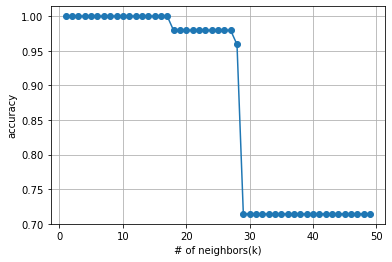

In [45]:
plt.plot(range(1, 50), knn_scores, 'o-')
plt.xlabel('# of neighbors(k)')
plt.ylabel('accuracy')
plt.grid()
plt.show()

As trying to plot the accuracy using k from 1 to 50, the performance started to slow from 18 and drastically dropped after k=28.

In [46]:
np.argmax(knn_scores)

0

In [47]:
np.argmin(knn_scores)

28

# 4. Sampling Issue

## Sequantial Sampling

In [48]:
num_train = 35

In [49]:
X_train, X_test = fish_data[:num_train], fish_data[num_train:]

In [50]:
y_train, y_test = fish_label[:num_train], fish_label[num_train:]

In [51]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [52]:
knn_clf = KNeighborsClassifier()

In [53]:
knn_clf.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [54]:
knn_clf.score(X_train, y_train)

1.0

In [55]:
test_predicts = knn_clf.predict(X_test)

In [100]:
clf_report = classification_report(y_true=y_test, y_pred=test_predicts, 
                                   labels=[0, 1],
                                   target_names=['Smelt', 'Bream'])
print(clf_report)

              precision    recall  f1-score   support

       Smelt       1.00      1.00      1.00         4
       Bream       1.00      1.00      1.00        11

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



sampling bias is a bias in which a sample is collected in such a way that some members of the intended population have a lower or higher sampling probability than others. Above shows 0 accuracy when fitting the model without considering appropriate sampling. 

## Random Sampling 

In [57]:
np.random.seed(1)
idx = np.arange(49)
np.random.shuffle(idx)
idx

array([27, 34, 39, 48,  2,  3, 42, 29, 45, 30, 31, 38, 21, 35, 19, 41, 36,
       26, 22, 13, 40, 17, 44, 24, 23,  4, 32, 14, 10, 28, 47, 33, 18, 20,
       25,  6,  7, 46,  1, 16,  0, 15,  5, 11,  9,  8, 12, 43, 37])

In [58]:
train_idx, test_idx = idx[:num_train], idx[num_train:]
train_idx

array([27, 34, 39, 48,  2,  3, 42, 29, 45, 30, 31, 38, 21, 35, 19, 41, 36,
       26, 22, 13, 40, 17, 44, 24, 23,  4, 32, 14, 10, 28, 47, 33, 18, 20,
       25])

In [59]:
test_idx

array([ 6,  7, 46,  1, 16,  0, 15,  5, 11,  9,  8, 12, 43, 37])

In [60]:
X_train, X_test = fish_data[train_idx], fish_data[test_idx]
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [61]:
y_train, y_test = fish_label[train_idx], fish_label[test_idx]
y_train.shape, y_test.shape

((35,), (14,))

In [62]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([11, 24]))

In [63]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([ 3, 11]))

In [64]:
3/14, 11/14

(0.21428571428571427, 0.7857142857142857)

It looks split well randomly. Let's check out the share to see if they are split in well proportion.

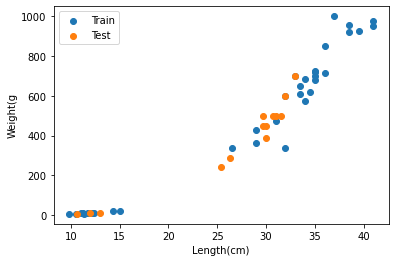

In [65]:
plt.scatter(X_train[:, 1], X_train[:, 0], label='Train')
plt.scatter(X_test[:, 1], X_test[:, 0], label='Test')

plt.legend()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g')
plt.show()

In [66]:
knn_clf = KNeighborsClassifier()

In [67]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
knn_clf.score(X_train, y_train)

1.0

In [69]:
knn_clf.score(X_test, y_test)

1.0

## Stratified Sampling

In statistics, [**_Stratified Sampling_**](https://en.wikipedia.org/wiki/Stratified_sampling) is a method of sampling from a population which can be partitioned into subpopulations.

In statistical surveys, when subpopulations within an overall population vary, it could be advantageous to sample each subpopulation (stratum) independently. Stratification is the process of dividing members of the population into homogeneous subgroups before sampling. The strata should define a partition of the population. That is, it should be collectively exhaustive and mutually exclusive: every element in the population must be assigned to one and only one stratum. Then simple random sampling is applied within each stratum. The objective is to improve the precision of the sample by reducing sampling error. It can produce a weighted mean that has less variability than the arithmetic mean of a simple random sample of the population.

<img src='https://www.netquest.com/hubfs/Imported_Blog_Media/Stratified_sampling.png'>

In [70]:
X_train, X_test, y_train, y_test = train_test_split(fish_data,       
                                                    fish_label,      
                                                    test_size=0.3,  
                                                    stratify=fish_label, 
                                                    random_state=1) 

In [71]:
X_train.shape, X_test.shape

((34, 2), (15, 2))

In [72]:
y_train.shape, y_test.shape

((34,), (15,))

In [73]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([10, 24]))

In [74]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([ 4, 11]))

In [75]:
4/15, 11/15  # Split share between Breams:Smelts

(0.26666666666666666, 0.7333333333333333)

It looks well split between the targets.

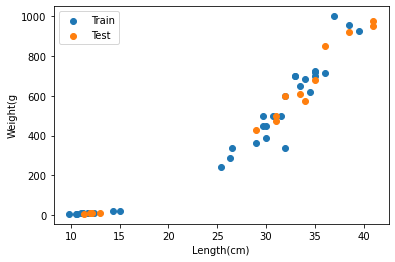

In [76]:
plt.scatter(X_train[:, 1], X_train[:, 0], label='Train')
plt.scatter(X_test[:, 1], X_test[:, 0], label='Test')

plt.legend()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g')
plt.show()

In [77]:
# knn Model 
knn_clf = KNeighborsClassifier()

In [78]:
# Model fi
knn_clf.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [79]:
# Model performance evaluation
knn_clf.score(X=X_train, y=y_train)

1.0

In [80]:
# Performance evaluation on test set
knn_clf.score(X_test, y=y_test)

1.0

In [81]:
test_predicts = knn_clf.predict(X=X_test)

In [82]:
confusion_matrix(y_true=y_test, y_pred=test_predicts)

array([[ 4,  0],
       [ 0, 11]])

In [83]:
clf_report = classification_report(y_true=y_test, y_pred=test_predicts, 
                                   labels=[0, 1],
                                   target_names=['Smelt', 'Bream'])
print(clf_report)

              precision    recall  f1-score   support

       Smelt       1.00      1.00      1.00         4
       Bream       1.00      1.00      1.00        11

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



As treid by stratified sampling, the Model shows well performance. 

# 5. Scaling Issue

Now I would like to cover the scaling issue. As talked above, kNN relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically.

Here comes the example. 

Let's assume we have 25cm, 150gram fish on the plot. 

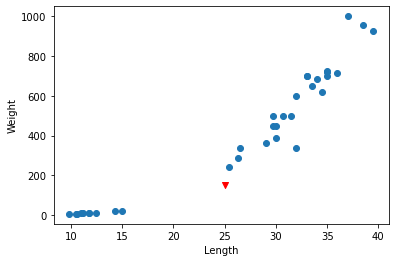

In [84]:
plt.scatter(25, 150, marker='v', color='red')
plt.scatter(X_train[:, 1], X_train[:, 0])

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

If we predict this sample, which would the result be? 

kNN returns '0' which is 'Smelt'. As Weight unit is much more bigger than Length, kNN tendes to rely more on Weight than Length. 

In [85]:
test_fish = [[150, 25]]
test_pred = knn_clf.predict(X=test_fish)
test_pred

array([0])

If I am tying to set the same scale, this will look like this. 
> Yellow mark below represent the first neighbor of 'Red(25cm, 150g)'

> Green mark below represent the second neighbor of 'Red(25cm, 150g)'

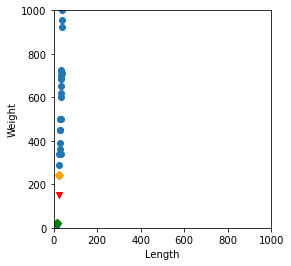

In [86]:
plt.scatter(25, 150, marker='v', color='red')
plt.scatter(X_train[:, 1], X_train[:, 0])
plt.scatter(X_train[0, 1], X_train[0, 0], marker='D', color='orange')
plt.scatter(X_train[18, 1], X_train[18, 0], marker='D', color='green')

plt.xlim((0, 1_000))
plt.ylim((0, 1_000))
plt.gca().set_aspect('equal')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

## Standardization


<img src='https://www.oreilly.com/library/view/hands-on-machine-learning/9781788393485/assets/7a9d8cb9-10f7-43b5-b52f-865fbbb0b69e.png' width=400 align='left'>

In [87]:
train_mean = np.mean(X_train, axis=0, keepdims=True)  
train_mean

array([[416.84117647,  26.32941176]])

In [88]:
train_std = np.std(X_train, axis=0, keepdims=True)
train_std

array([[313.14851214,   9.87085816]])

In [89]:
X_train_scaled = (X_train - train_mean) / train_std
X_train_scaled[:5]

array([[-0.55833309, -0.09415714],
       [ 1.71854185,  1.23298178],
       [ 0.26555714,  0.34146861],
       [-1.2998343 , -1.5327352 ],
       [ 0.6487619 ,  0.82774852]])

In [90]:
np.mean(X_train_scaled, axis=0), np.std(X_train_scaled, axis=0)

(array([-6.53072367e-17, -2.41636776e-16]), array([1., 1.]))

In [91]:
X_test_scaled = (X_test - train_mean) / train_std
X_test_scaled[:5]

array([[1.70257499, 1.48625256],
       [0.26555714, 0.47316942],
       [0.61682817, 0.72644021],
       [0.04202103, 0.27055279],
       [1.38323769, 0.97971099]])

In [92]:
# Scaling the test fish
test_fish_scaled = (test_fish - train_mean) / train_std
test_fish_scaled

array([[-0.85212341, -0.13468046]])

Plot the train set after scaling.

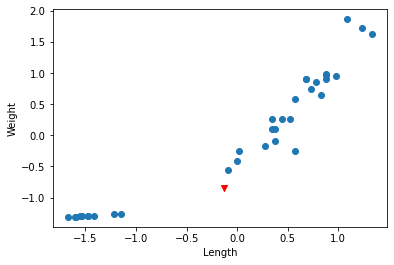

In [93]:
plt.scatter(X_train_scaled[:, 1], X_train_scaled[:, 0])
plt.scatter(test_fish_scaled[0, 1], test_fish_scaled[0, 0], marker='v', color='red')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

Now I am going to test the model based on scaled data-sets.

In [94]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X=X_train_scaled, y=y_train)
test_pred = knn_clf.predict(X=test_fish_scaled)
test_pred  # Bream 

array([1])

In [95]:
knn_clf.score(X=X_train_scaled, y=y_train)

1.0

In [96]:
knn_clf.score(X=X_test_scaled, y=y_test)

1.0

In [97]:
test_predicts = knn_clf.predict(X=X_test_scaled)

In [98]:
clf_report = classification_report(y_true=y_test, y_pred=test_predicts, 
                                   labels=[0, 1],
                                   target_names=['Smelt', 'Bream'])
print(clf_report)

              precision    recall  f1-score   support

       Smelt       1.00      1.00      1.00         4
       Bream       1.00      1.00      1.00        11

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



Now all looks perfect. 

# 6. Conclusion

This is the summary of the notbooek. 

* k-nearest neighbors algorithm is used for classification and regression. The output depends on whether k-NN is used for classification or regression.
* There is a better way of doing it by trying a bunch of different hyperparameter values.Scikit-learn provides a simple way of achieving this using `n_neightbors`.
* As this replies on the distance, data should be collectively exhaustive and mutually.
* If the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically.


---

<img src='https://cdn.images.express.co.uk/img/dynamic/130/590x/Fishing-and-lockdown-fishing-exercise-latest-news-coronavirus-1259607.webp?r=1592143825316'>